## Standard TCP Protocol
alpha = 1, beta = 0.5

Final x1: 2.9999999403953552
Final x2: 3.0000000596046448


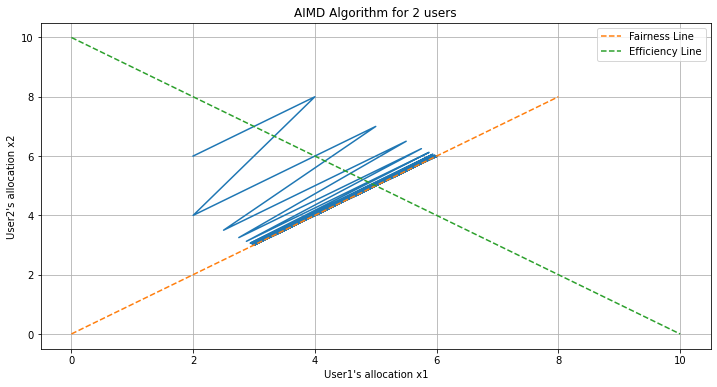

In [48]:
import numpy as np
import matplotlib.pyplot as plt

ITERATESMAX = 100
C = 10
x1 = 1
x2 = 5
x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)

for i in range(ITERATESMAX):
    if (x1 + x2 <= C):
        # Additive increase phase
        x1 += 1
        x2 += 1
    else:
        # Multiplicative decrease phase
        x1 = x1 * 0.5
        x2 = x2 * 0.5

    # Store values in arrays
    x1_values[i] = x1
    x2_values[i] = x2

# Display the final values
print("Final x1:", x1)
print("Final x2:", x2)

# Plotting the results
max_value = max(max(x1_values), max(x2_values))
plt.figure(figsize=(12, 6))
plt.plot(x1_values, x2_values)
plt.plot([0, max_value], [0, max_value], '--', label='Fairness Line')
plt.plot([0, C], [C, 0], '--', label='Efficiency Line')
plt.xlabel("User1's allocation x1")
plt.ylabel("User2's allocation x2")
plt.title('AIMD Algorithm for 2 users')
plt.legend()
plt.grid(True)
plt.show()

## Modified AIMD algorithm to favour user 2

Final x1: 1.99999999988741
Final x2: 3.0000000596046448


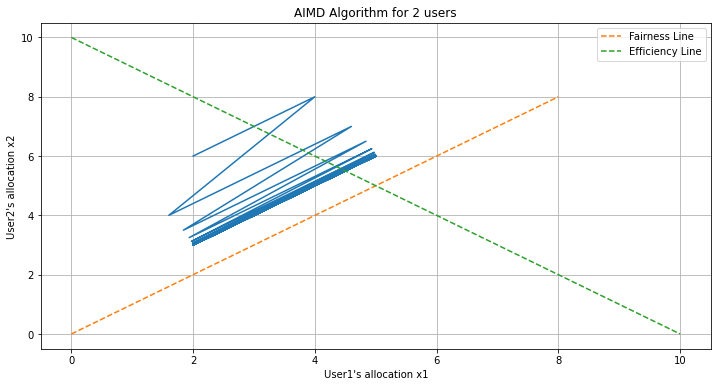

In [51]:
import numpy as np
import matplotlib.pyplot as plt

ITERATESMAX = 100
C = 10
x1 = 1
x2 = 5

for i in range(ITERATESMAX):
    if (x1 + x2 <= C):
        # Additive increase phase
        x1 += 1
        x2 += 1
    else:
        # Multiplicative decrease phase
        x1 = x1 * 0.4  # multiplicative decrease factor for x1 increased
        x2 = x2 * 0.5  

    # Store values in arrays
    x1_values[i] = x1
    x2_values[i] = x2

# Display the final values
print("Final x1:", x1)
print("Final x2:", x2)

# Plotting the results
max_value = max(max(x1_values), max(x2_values))
plt.figure(figsize=(12, 6))
plt.plot(x1_values, x2_values)
plt.plot([0, max_value], [0, max_value], '--', label='Fairness Line')
plt.plot([0, C], [C, 0], '--', label='Efficiency Line')
plt.xlabel("User1's allocation x1")
plt.ylabel("User2's allocation x2")
plt.title('AIMD Algorithm for 2 users')
plt.legend()
plt.grid(True)
plt.show()

## Modified AIMD algorithm for data centers

Final x1: 26.11696649279376
Final x2: 19.0865987330262


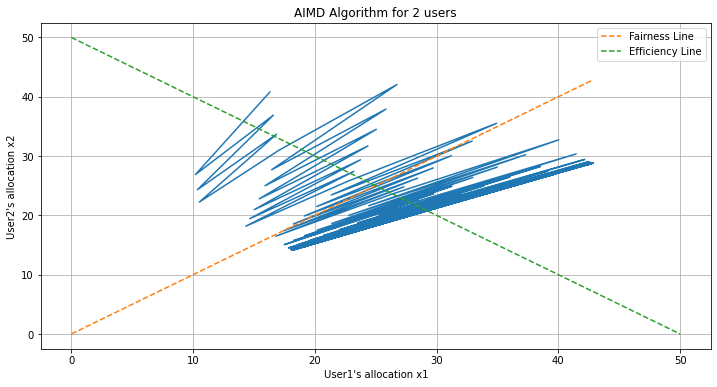

In [105]:
import numpy as np
import matplotlib.pyplot as plt

ITERATESMAX = 200
C = 50
exponent1 = 0.6 
exponent2 = 0.65  
x1 = 10
x2 = 30
alpha1 = 0.8
alpha2 = 0.7
x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)

def adjusted_multiplicative_decrease(x, factor):
    return x * factor + (1 - factor)

for i in range(ITERATESMAX):
    if (x1 + x2 <= C):
        # Additive increase phase
        x1 += np.power(x1,alpha1)
        x2 += np.power(x2,alpha2)
    else:
        # Multiplicative decrease phase
        x1 = adjusted_multiplicative_decrease(x1, exponent1)
        x2 = adjusted_multiplicative_decrease(x2, exponent2)

    # Store values in arrays
    x1_values[i] = x1
    x2_values[i] = x2

# Display the final values
print("Final x1:", x1)
print("Final x2:", x2)

# Plotting the results
max_value = max(max(x1_values), max(x2_values))
plt.figure(figsize=(12, 6))
plt.plot(x1_values, x2_values)
plt.plot([0, max_value], [0, max_value], '--', label='Fairness Line')
plt.plot([0, C], [C, 0], '--', label='Efficiency Line') 
plt.xlabel("User1's allocation x1")
plt.ylabel("User2's allocation x2")
plt.title('AIMD Algorithm for 2 users')
plt.legend()
plt.grid(True)
plt.show()